# Crime Analysis of Montgomery County.

In this analysis,  two questions will be explored. First, are there any patterns in crime and what safety levels exist in the cities throughout the Montgomery County Maryland.

The dataset used in work can be downloaded here https://drive.google.com/file/d/0B6nj1d7RmQ7Ta3JRRTcxN1hVYzg/view?usp=sharing

# Inference

1. Most crimes were reported between 6am and 12pm

2. About 35% of all crime are considered violent

3. Brookeville has the highest violent crimes reported per Capita

4. It's most dangerous to be out in the evenings and at night


In [1]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns=25
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cols=['Incident ID','CR Number','Dispatch Date / Time','Class',
'Class Description','Police District Name','Block Address','City','State',
'Zip Code','Agency','Place','Sector','Beat','PRA','Start Date / Time',
      'End Date / Time','Latitude', 'Longitude','Police District Number', 
      'Location','Address Number']

In [3]:
data=pd.read_csv('/home/raphael/Documents/DataSets/crime_no_headers.csv')

In [4]:
data.columns=cols

In [5]:
data.head()

,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number
0,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,M,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN
1,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,GPD,Parking Garage - County,P,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN
2,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,MCPD,Street - In vehicle,D,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN
3,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,MCPD,Street - Residential,D,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN
4,200931009,13037095,08/07/2013 11:31:19 PM,1864,CDS IMPLMNT-MARIJUANA/HASHISH,MONTGOMERY VILLAGE,N270 CUTOVR X8 TO X9 HWY,GAITHERSBURG,MD,NaN,MCPD,Street - In vehicle,P,6P1,444.0,08/07/2013 11:31:00 PM,NaN,NaN,NaN,6D,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 22 columns):
Incident ID               23368 non-null int64
CR Number                 23368 non-null int64
Dispatch Date / Time      23368 non-null object
Class                     23368 non-null int64
Class Description         23368 non-null object
Police District Name      23368 non-null object
Block Address             23368 non-null object
City                      23368 non-null object
State                     23368 non-null object
Zip Code                  23338 non-null float64
Agency                    23368 non-null object
Place                     23368 non-null object
Sector                    23323 non-null object
Beat                      23361 non-null object
PRA                       23363 non-null float64
Start Date / Time         23368 non-null object
End Date / Time           13191 non-null object
Latitude                  23208 non-null float64
Longitude                 2

In [7]:

data.loc[:,"Dispatch Date / Time"]=pd.to_datetime(data["Dispatch Date / Time"])
crime_month=data["Dispatch Date / Time"].dt.month

crime_month_sorted=crime_month.value_counts().sort_index()
print("The total number of crimes committed per month is \n\n", crime_month_sorted)

The total number of crimes committed per month is 

 7     3520
8     4002
9     3927
10    4074
11    3941
12    3904
Name: Dispatch Date / Time, dtype: int64


In [8]:
# Most crimes are committed in October. Maybe because some persons want
# to make quick cash before the Christmas holidays. It is important to
#note that only data for July to Dec is available. Thus, some 
#interpolation might be necessary to really be able to forecast yearly
#trends.

# Percentage of crimes per week day

In [9]:
crime_weekday=data["Dispatch Date / Time"].dt.weekday_name
crime_weekday_percent=crime_weekday.value_counts(normalize=True)*100
print("Percentage of crimes committed each day \n\n", crime_weekday_percent)

Percentage of crimes committed each day 

 Tuesday      16.415611
Monday       15.979117
Wednesday    15.448477
Friday       15.380007
Thursday     14.566929
Saturday     12.012153
Sunday       10.197706
Name: Dispatch Date / Time, dtype: float64


In [10]:
#More crimes are committed on Tuesday-16%

As they say, a picture is worth a thousand words. Lets illustrate the
above result in a graph. These are categorical variables so a bar
chart is a good candidate

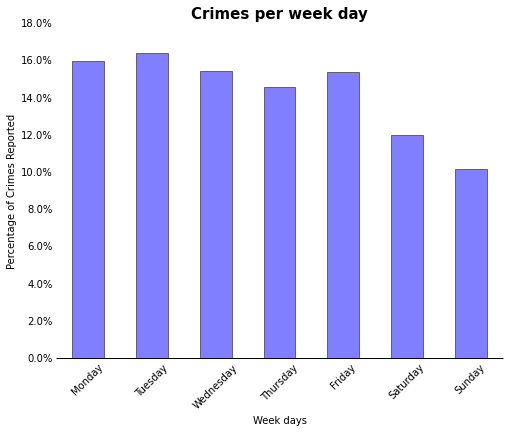

In [11]:
crime_week_day_percent=crime_weekday_percent.reindex(["Monday","Tuesday",
"Wednesday","Thursday","Friday","Saturday","Sunday"])

ax=crime_week_day_percent.plot(kind='bar',figsize=(8,6),alpha=0.5)



plt.title("Crimes per week day", weight='bold', fontsize=15,color='black')
plt.xlabel("Week days", color="black")
plt.xticks(rotation=45,color='black')
plt.yticks(color='black')

vals = ax.get_yticks()


ax.set_yticklabels(['{:3.1f}%'.format(x) for x in vals])
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off")
plt.ylabel('Percentage of Crimes Reported', color='black')
plt.show()

# Let's look at crimes  committed in 24hrs

In [12]:
#Lets define a typical day as the times between the hours of 6am and 6pm

hour_crime=data["Dispatch Date / Time"].dt.hour

day_crime=(hour_crime >=6) &( hour_crime <18)
day_crime_counts=day_crime.value_counts()

#Let's re-assign the index

day_crime_counts.index=["Day", "Night"]

print(" The number of crimes committed during the day vs night are : \n", day_crime_counts)


 The number of crimes committed during the day vs night are : 
 Day      13813
Night     9555
Name: Dispatch Date / Time, dtype: int64


This shows that 59% of the crimes are committed during the day



Let's have a look at the break down of the crimes committed during the day


In [13]:

crime_int_6hrs={'Morning': '', 'Afternoon':'', 'Evening': '', 'Night':''}


#initialize a for loop such that it loops through the crime_int_6hrs and applying a customized filter
#we gona create

i=0

for item in crime_int_6hrs:
    crime_int_6hrs[item]=hour_crime[(hour_crime >=i) & (hour_crime <i+6)   ].shape[0]
    i=i+6
    
    

print("Crimes as committed every 6hours : \n", crime_int_6hrs)    
    

Crimes as committed every 6hours : 
 {'Afternoon': 3269, 'Evening': 6971, 'Night': 6842, 'Morning': 6286}


Turns out that most crimes are committed at Night. A nice way to visuzlize this breakdown will be with the aid of
a pie chart. Let's make one

In [14]:
import seaborn as sns

sns.set_style("whitegrid")

/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


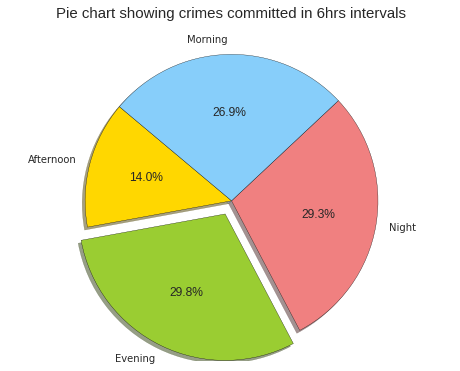

In [15]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode=(0,0.1,0,0)
plt.pie([val for val in crime_int_6hrs.values()],explode=explode, labels=[k for k in crime_int_6hrs.keys()],
       colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)


plt.axis("equal")
plt.title("Pie chart showing crimes committed in 6hrs intervals",fontsize=15,y=1.1)
plt.show()

# How long does it take an officer to get to a crime scene ?

To get this information,  difference between the Disptach Time  and Start Time columns will be calculated

In [16]:
disp_time=pd.to_datetime(data['Dispatch Date / Time'])
start_time=pd.to_datetime(data["Start Date / Time"])

data['Time_diff']=disp_time-start_time


print(data["Time_diff"].head(15))

0     0 days 00:00:58
1     0 days 00:00:24
2     0 days 00:00:15
3     0 days 00:00:17
4     0 days 00:00:19
5     0 days 00:00:08
6     0 days 00:16:49
7     0 days 00:00:15
8     0 days 00:00:48
9     0 days 00:00:09
10    0 days 00:00:21
11    0 days 00:00:35
12   60 days 04:18:25
13    0 days 00:00:24
14    0 days 00:00:48
Name: Time_diff, dtype: timedelta64[ns]


The above output has an inconsistency-for example, line 12 makes no sense as it can't take a cop 60 days
to get to a crime scene. This is an outlier which we must get rid of. To get this done, we will filter out values greater than a day.

In [17]:
data['Time_diff_days']=data["Time_diff"].astype('timedelta64[D]')

day_filter=~(data["Time_diff_days"]>0) & ~(data["Time_diff_days"]<0)

avg_resp_time=data[day_filter]['Time_diff'].median()

print("The average response time for a reported crime is \n:", avg_resp_time)

The average response time for a reported crime is 
: 0 days 00:00:48


 wow! 48 seconds. That seems too fast. However, it is important to remember that the above times is not the time
 it takes the officers to arrive at the crime scene. But its the time between when a crime is called in and when an officer is dispatched.

# Crimes by city

Let's visualize the crimes reported by city. The city column in the dataset will be employed for this task. This is not a continuous variable, so a line graph won't be ideal. It looks more like a categorical variable

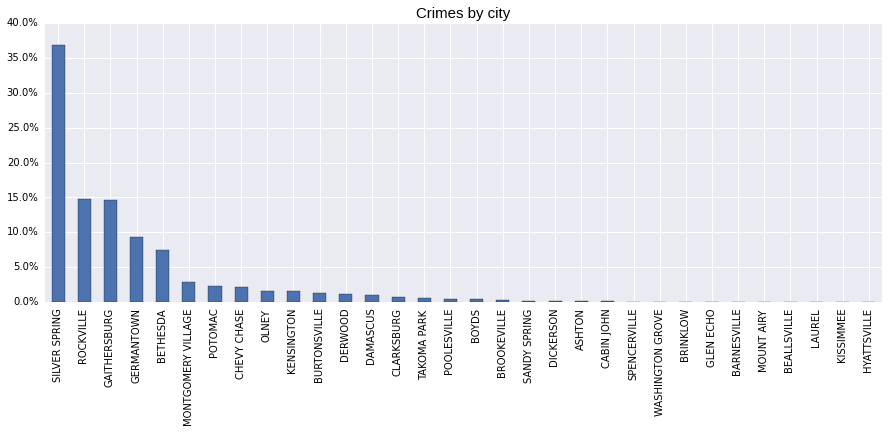

In [18]:
sns.set_style("darkgrid")

crime_by_city=data["City"].value_counts(normalize=True)*100

ax=crime_by_city.plot(kind="bar",x="City", figsize=(15,5))
plt.grid('on')

plt.title("Crimes by city", color='black', fontsize='15')
plt.xticks(color='black')

vals=ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x) for x in vals])
plt.yticks(color='black')

plt.show()

As shown above, Silver Spring has the most crimes committed. Let's investiage the crime per capita of each area. A little research online turned up the population of each area. This will be encaspulated in a python dictonary


In [19]:
pop_by_city ={'SILVER SPRING': 71452,'ROCKVILLE': 61209,'GAITHERSBURG': 66816, 'GERMANTOWN': 90676,
              
              
              'BETHESDA': 60858,'MONTGOMERY VILLAGE': 32032, 'POTOMAC': 44965, 'CHEVY CHASE': 2959,
              
              
              'OLNEY': 33844,'KENSINGTON': 2313,'BURTONSVILLE':13344,'DERWOOD':15600,'DAMASCUS':11430,
              
              'CLARKSBURG':13677,'TAKOMA PARK':17670,'POOLESVILLE':5160,'BOYDS':10460,'BROOKEVILLE':134,
              
              'SANDY SPRING':5648,'DICKERSON':1848,'ASHTON':5648,'SPENCERVILLE':15594,
              
              'WASHINGTON GROVE':573,'BRINKLOW':154,'BARNESVILLE':178,'GLEN ECHO':269,'MOUNT AIRY':9388,
              
              'LAUREL':26160,'BEALLSVILLE':111,'HYATTSVILLE':18420} 



crime_per_capita = {}


crime_per_capita = {city:((crime_by_city.loc[city]/pop)*100000) for (city, pop) in pop_by_city.items()}


crimes_per_100000_people = pd.DataFrame({'City': list(crime_per_capita.keys()), 
              'Crimes per 100000 people': list(crime_per_capita.values())})
crimes_per_100000_people = crimes_per_100000_people.set_index('City')
crimes_per_100000_people.head(10)


,Crimes per 100000 people
City,
KENSINGTON,67.159808
DAMASCUS,8.573689
MONTGOMERY VILLAGE,9.178065
DERWOOD,7.406578
BURTONSVILLE,9.749133
BARNESVILLE,9.616531
HYATTSVILLE,0.023232
BRINKLOW,13.894014
GLEN ECHO,6.363355


Let's vizualize the above data

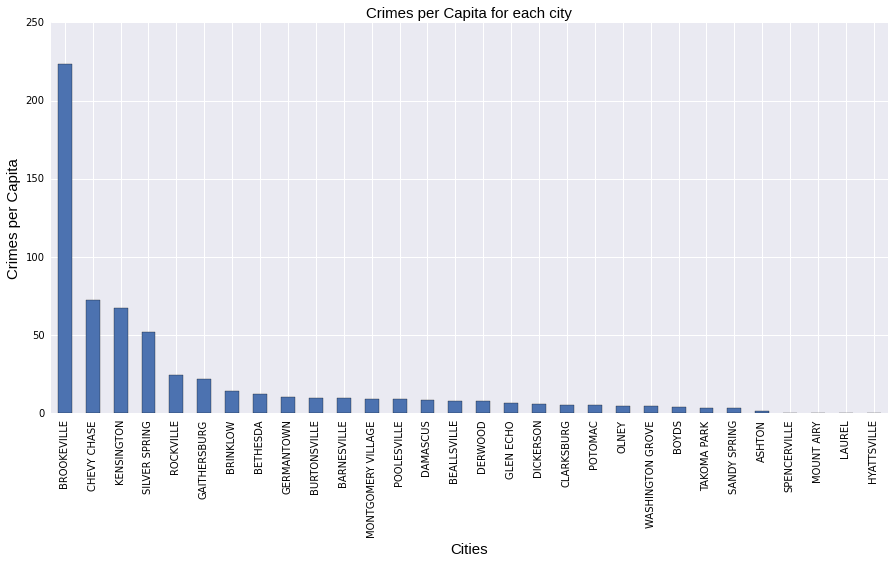

In [20]:
crimes_per_100000_people.sort_values('Crimes per 100000 people',ascending=False, inplace=True)
crimes_per_100000_people.plot(kind='bar',figsize=(15,7),legend=None)


plt.grid(True)
plt.title("Crimes per Capita for each city",color='black',fontsize=15)

plt.xlabel("Cities", color='black',fontsize=15)
plt.xticks(color='black')


vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x) for x in vals])
plt.ylabel('Crimes per Capita', color='black',fontsize=15)
plt.yticks(color='black')
plt.show()

Now we gain a better understanding of the data itself. We should have expected Silver Spring to lead the pack as it has twice the amount of crimes being reported than the next closest city. This is why it is important that a per capita value is used when comparing large population centres to smaller ones.


In this graph, Brookeville has the largest amount of crime and it has a population of 134 people. 

# Violent crimes

Let's  look at the various crimes being committed and determine whether they are violent or not and then suggest which cities should be avoided.

In [21]:
type_crime=data['Class Description'].value_counts()
pd.options.display.max_rows=1000
type_crime.head(1000)

DRIVING UNDER THE INFLUENCE                        1710
CDS-POSS MARIJUANA/HASHISH                         1334
POL INFORMATION                                    1191
LARCENY FROM AUTO OVER $200                         914
LARCENY FROM BUILDING OVER $200                     895
MENTAL TRANSPORT                                    841
VANDALISM-MOTOR VEHICLE                             762
LOST PROPERTY                                       729
LARCENY OTHER OVER $200                             652
LARCENY FROM AUTO UNDER $50                         610
FORGERY/CNTRFT - IDENTITY THEFT                     596
LARCENY SHOPLIFTING OVER $200                       529
LARCENY SHOPLIFTING $50 - $199                      489
LIQUOR - DRINK IN PUB OVER 21                       482
DISORDERLY CONDUCT                                  464
ASSAULT & BATTERY - CITIZEN                         382
LARCENY FROM AUTO $50 - $199                        356
FORGERY/CNTRFT-CRDT CARDS                       

Lets agree on some keywords that will be used to associate violent crimes. Keywords such as "Assault, "Asslt" surely fits the bill. Others such as "Rape, Homicide, Larceny" etc also fit the bill. With these keywords, we determine the percentage of violent  to non-violent crimes

In [22]:
data['Violent crime'] = data['Class Description'].str.contains(
    'ASSAULT|ASSLT|RAPE|HOMICIDE|KNIFE|FIREARM|ARMED|ARSON|ROBBERY|LARCENY')

data.loc[data["Violent crime"]==True, 'Violent crime']="Violent"

data.loc[data["Violent crime"]==False, 'Violent crime']="Non-violent"

data.value_counts=data["Violent crime"].value_counts(normalize=True)*100

print("About 34% of crimes are violent in nature \n:", data.value_counts.head())

About 34% of crimes are violent in nature 
: Non-violent    65.080452
Violent        34.919548
Name: Violent crime, dtype: float64


In [23]:
data["Violent crime"].loc[0:15]

0     Non-violent
1     Non-violent
2     Non-violent
3     Non-violent
4     Non-violent
5     Non-violent
6     Non-violent
7     Non-violent
8     Non-violent
9     Non-violent
10    Non-violent
11    Non-violent
12        Violent
13        Violent
14    Non-violent
15    Non-violent
Name: Violent crime, dtype: object

# Violent crimes by city

Let's figure out which cities these violent crimes are committed. Which city do you think would lead the pack?  Brookeville or Silver Spring? Let's see.

In [24]:
violent_crime=data[data["Violent crime"]=="Violent"]
print(violent_crime['City'].value_counts(normalize=True)*100)

SILVER SPRING         37.352941
ROCKVILLE             14.816176
GAITHERSBURG          13.713235
BETHESDA               9.105392
GERMANTOWN             8.700980
CHEVY CHASE            3.002451
MONTGOMERY VILLAGE     2.500000
POTOMAC                2.071078
KENSINGTON             1.960784
OLNEY                  1.531863
BURTONSVILLE           1.066176
DERWOOD                0.955882
CLARKSBURG             0.674020
DAMASCUS               0.637255
TAKOMA PARK            0.563725
POOLESVILLE            0.343137
BOYDS                  0.318627
SANDY SPRING           0.171569
BROOKEVILLE            0.171569
CABIN JOHN             0.085784
DICKERSON              0.085784
ASHTON                 0.073529
SPENCERVILLE           0.036765
BRINKLOW               0.024510
GLEN ECHO              0.012255
BEALLSVILLE            0.012255
KISSIMMEE              0.012255
Name: City, dtype: float64


Nothing does the job better than a graph. Let's make one

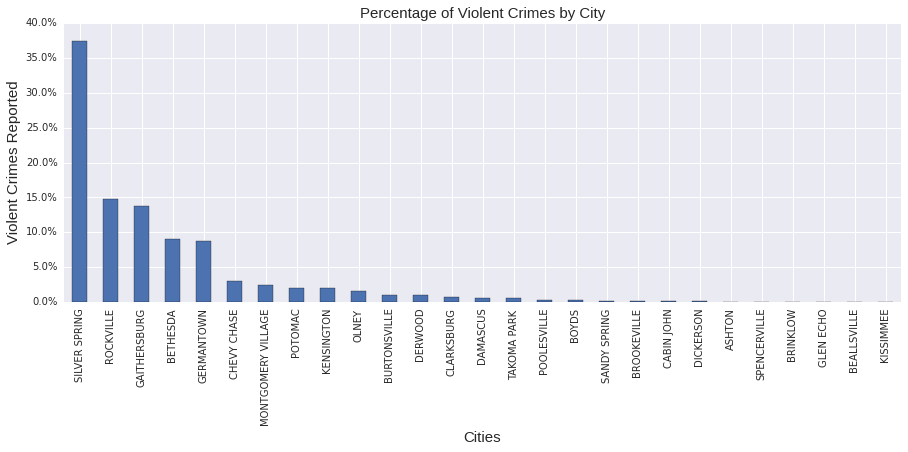

In [25]:
violent_crime_counts=violent_crime["City"].value_counts(normalize=True)*100

ax=violent_crime_counts.plot(kind='bar',x='City', figsize=(15,5))


plt.grid(True)

plt.title("Percentage of Violent Crimes by City",fontsize=15)

plt.xlabel("Cities",fontsize=15)


plt.ylabel('Violent Crimes Reported',fontsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x) for x in vals])

plt.show()

We can now calculate the population per capita and determine which city has the most violent crimes per capita

In [26]:
pop_by_city_2 = {'SILVER SPRING': 71452,'ROCKVILLE': 61209,'GAITHERSBURG': 66816, 'GERMANTOWN': 90676, 
              'BETHESDA': 60858,'MONTGOMERY VILLAGE': 32032, 'POTOMAC': 44965, 'CHEVY CHASE': 2959, 
              'OLNEY': 33844,'KENSINGTON': 2313,'BURTONSVILLE':13344,'DERWOOD':15600,'DAMASCUS':11430,
              'CLARKSBURG':13677,'TAKOMA PARK':17670,'POOLESVILLE':5160,'BOYDS':10460,'BROOKEVILLE':134,
              'SANDY SPRING':5648,'DICKERSON':1848,'ASHTON':5648} 

violent_crime_per_capita = {}

violent_crime_per_capita = {city: (violent_crime_counts.loc[city]/pop)*100000 for (city, pop) in pop_by_city_2.items()}

violent_crimes_per_100000_people = pd.DataFrame({'City': list(violent_crime_per_capita.keys()), 
              'Violent Crimes per 100000 people': list(violent_crime_per_capita.values())})
violent_crimes_per_100000_people = violent_crimes_per_100000_people.set_index('City')
violent_crimes_per_100000_people.head(30)

,Violent Crimes per 100000 people
City,
CHEVY CHASE,101.468435
BETHESDA,14.961701
MONTGOMERY VILLAGE,7.804695
GERMANTOWN,9.595682
BROOKEVILLE,128.036289
KENSINGTON,84.772344
POTOMAC,4.605979
DICKERSON,4.642008
BURTONSVILLE,7.989932


Let's generate a plot of the above table

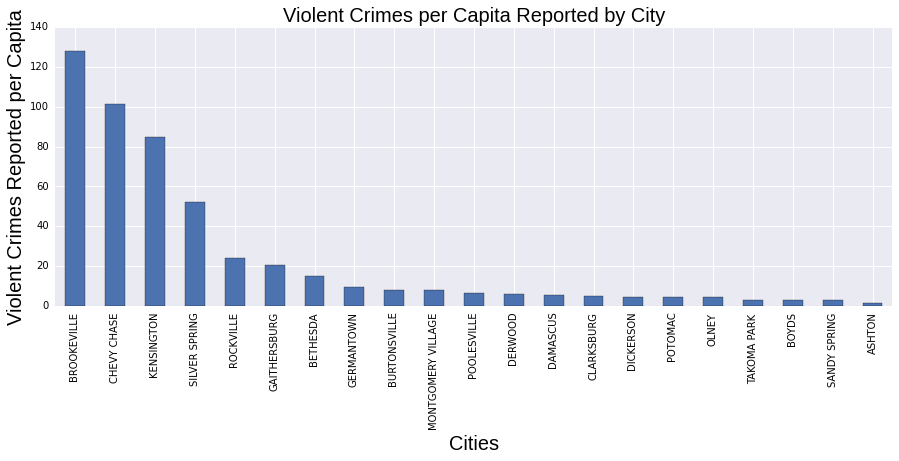

In [27]:
violent_crimes_per_100000_people.sort_values('Violent Crimes per 100000 people',ascending=False, inplace=True)
violent_crimes_per_100000_people.plot(kind='bar',figsize=(15,5),legend=None)


plt.grid(True)

plt.title("Violent Crimes per Capita Reported by City",color='black',fontsize=20)

plt.xlabel("Cities", color='black',fontsize=20)
plt.xticks(color='black')

plt.ylabel('Violent Crimes Reported per Capita', color='black',fontsize=20)
plt.yticks(color='black')

plt.show()

# Let's have a look at the violent crimes committed over a 24hour  period


In [41]:
hr_violent_crime=data["Dispatch Date / Time"].dt.hour
day_violent_crime= (hr_violent_crime >=6) & (hr_violent_crime <18)
day_violent_crime.value_counts=day_crime.value_counts()
day_violent_crime.value_counts.index=["Day", "Night"]

print("Respectively", "\n", day_violent_crime.value_counts,  "are the number of crimes")

Respectively 
 Day      13813
Night     9555
Name: Dispatch Date / Time, dtype: int64 are the number of crimes


As can be seen, most violent crimes are reported during the day. Let's probe further using 6hours windows.

In [42]:
violent_crime_6hrs={"Night": '', "Morning": '', "Afternoon": '', "Evening": ''}

i=0

for item in violent_crime_6hrs:
    violent_crime_6hrs[item]=hr_violent_crime[ (hour_crime >=i) & (hr_violent_crime < i+6) ].shape[0]
    i+=6
    
print("Crimes by 6 hour intervals: \n", violent_crime_6hrs)    

Crimes by 6 hour intervals: 
 {'Afternoon': 3269, 'Evening': 6971, 'Night': 6842, 'Morning': 6286}


A picture is worth a thousand words. Let's vizualize this result

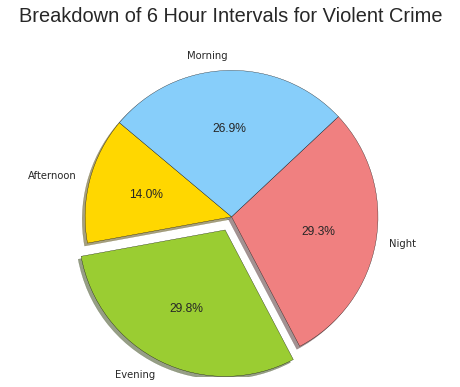

In [43]:
colors=['gold', 'yellowgreen', 'lightcoral','lightskyblue']
explode = (0, 0.1, 0, 0)
plt.pie([val for val in violent_crime_6hrs.values()],explode=explode, labels=[k for k in violent_crime_6hrs.keys()], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Breakdown of 6 Hour Intervals for Violent Crime', y=1.14,fontsize=20)
plt.show()

Clearly,  its most dangerous to be out in Montgomery County in the evenings and at night